# Downloading and Prepping Data <a id="2"></a>

**Renata Alfianto Rasyid (1301213304) - Visualisasi Data IF-44-DS02**


Import primary modules.

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [4]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-5-233caddc09ab>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [6]:
# menghapus nama index 'country'
df_can.index.name = None
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


**Question 1:** Using a pie chart, explore the proportion (percentage) of
new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [8]:
# group countries by continents in the year 2013 and apply sum() function
df_continents = df_can.groupby('Continent')['2013'].sum()

df_continents.head()

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Name: 2013, dtype: int64

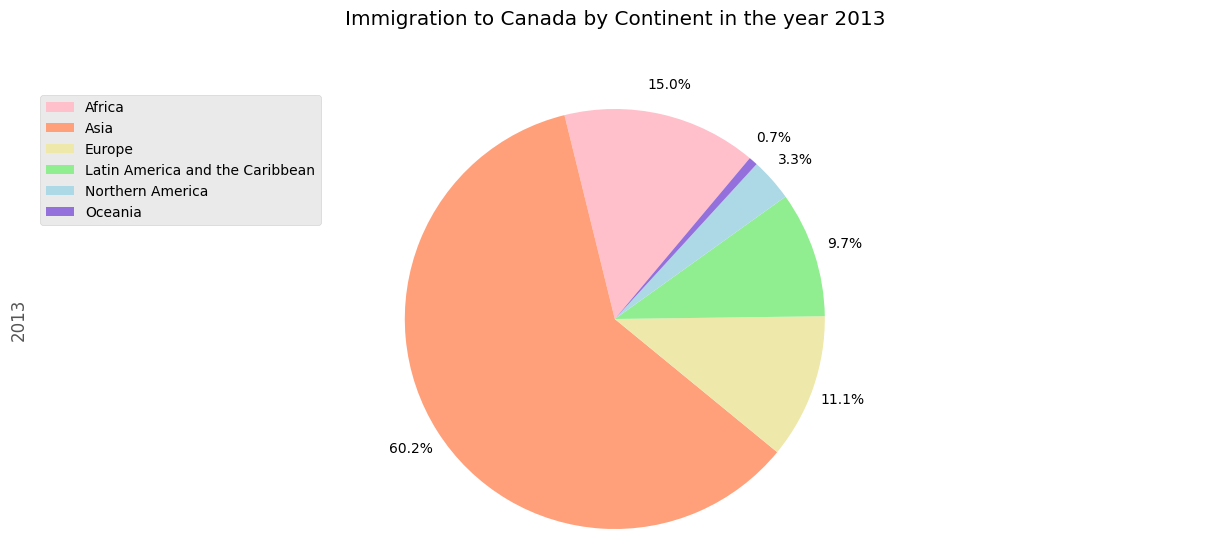

In [19]:
colors_list = ['pink', 'lightsalmon', 'palegoldenrod', 'lightgreen', 'lightblue', 'mediumpurple']

df_continents.plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%',
                   startangle=50,
                   shadow=False,
                   labels=None,         # turn off labels on pie chart
                   pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                   colors=colors_list,  # add custom colors
                   )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in the year 2013', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

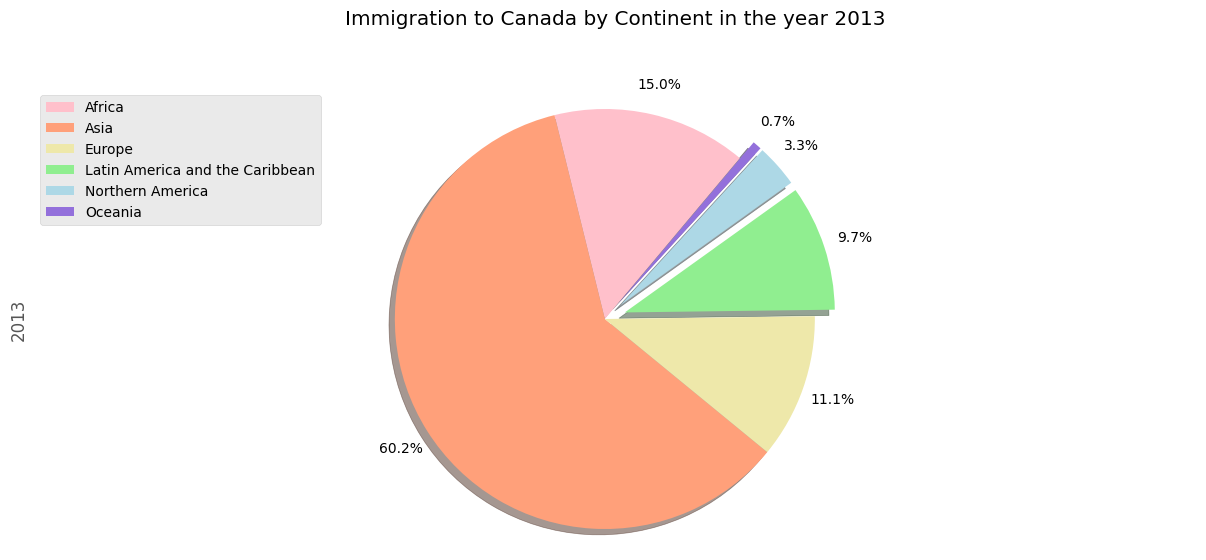

In [22]:
explode_list = [0, 0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
colors_list = ['pink', 'lightsalmon', 'palegoldenrod', 'lightgreen', 'lightblue', 'mediumpurple']

df_continents.plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%',
                   startangle=50,
                   shadow=True,
                   labels=None,         # turn off labels on pie chart
                   pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                   colors=colors_list,  # add custom colors
                   explode=explode_list # 'explode' lowest 3 continents
                   )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in the year 2013', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [28]:
### type your answer here
df_PA = df_can.loc[['Pakistan', 'Afghanistan'], years].transpose()

df_PA.head()

,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71


Step 2: Plot data.

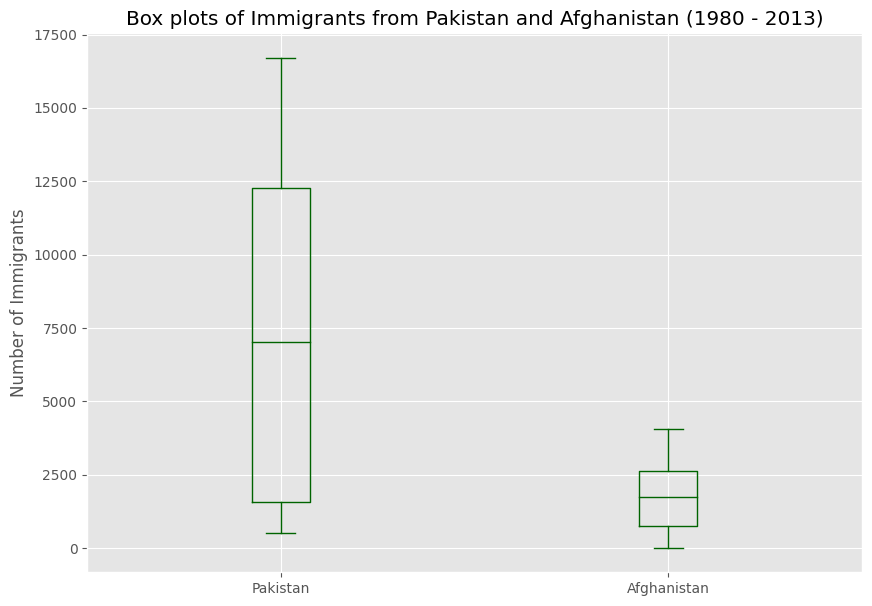

In [44]:
df_PA.plot(kind='box', figsize=(10, 7), color='darkgreen')

plt.title('Box plots of Immigrants from Pakistan and Afghanistan (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

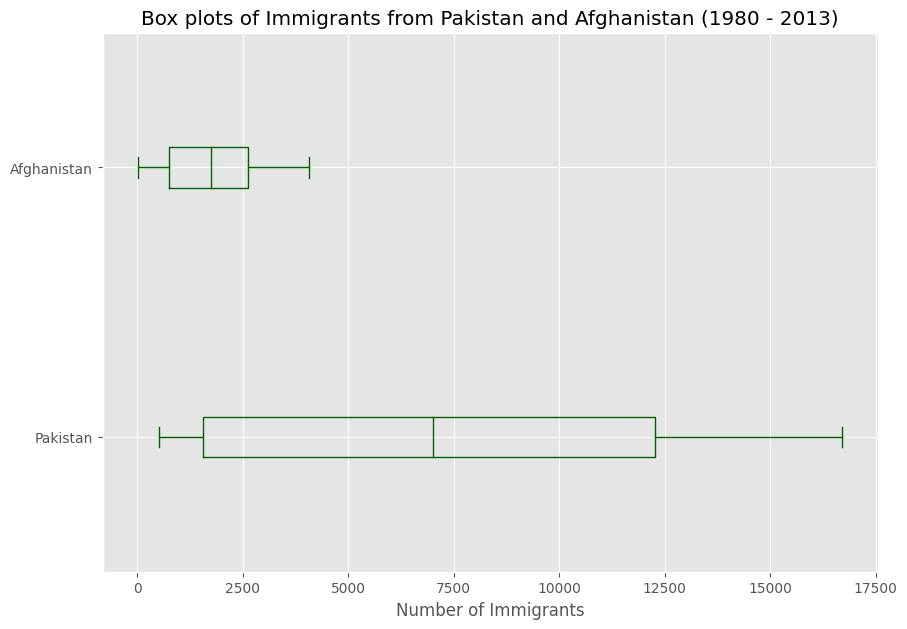

In [46]:
df_PA.plot(kind='box', figsize=(10, 7), color='darkgreen', vert=False)

plt.title('Box plots of Immigrants from Pakistan and Afghanistan (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [34]:
### type your answer here
# we can use the sum() method to get the total population per year
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden']]

df_countries.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [35]:
df_total = pd.DataFrame(df_countries[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

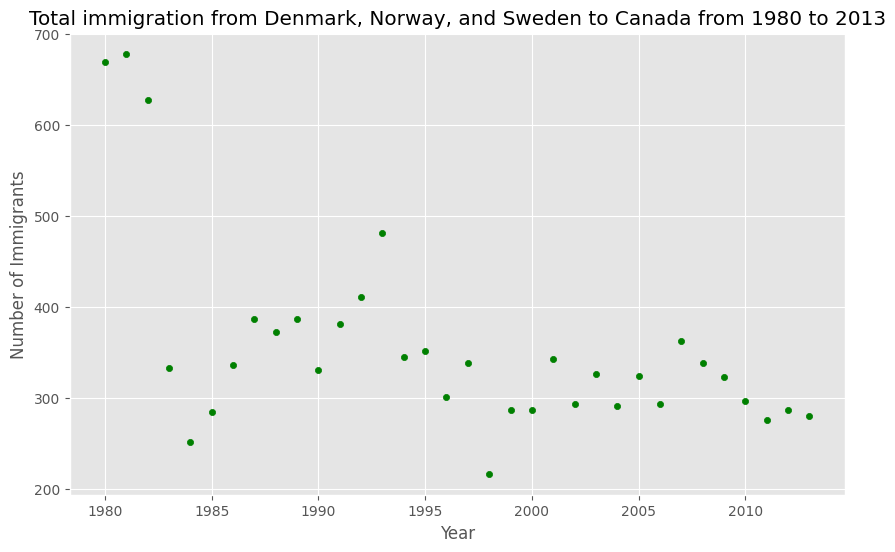

In [40]:
### type your answer here
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='green')

plt.title('Total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [14]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()


,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [15]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

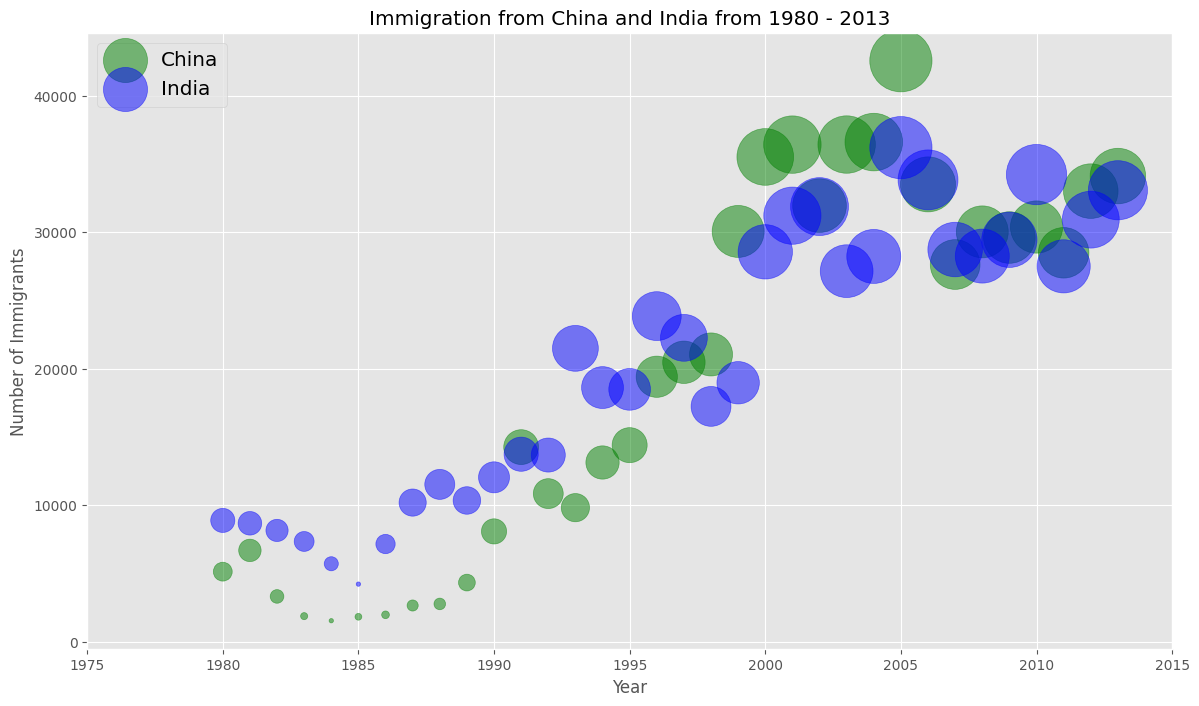

In [43]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
#                     s=norm_china * 2000 + 10,  # pass in weights
                    s=norm_china * 2000 + 10,
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
#                     s=norm_india * 2000 + 10,
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).